# Soustava hmotných bodů

Těleso - soustava hmotných bodů\
Tuhé těleso - pevný předmět jehož rozměry se nemění

Hmotný střed - Místo, kam můžeme soustředit veškerou hmotnost tělesa. Leží z definice někde mezi nejlehčím bodem a nejtěžším. Pokud má těleso osu symetrie, tak h
motný střed bude ležet někde v ní.
Těžiště = místo, kam můžeme soustředit veškerou tíhu tělesa.

Stěžejní význam pro Newtonovy zákony -> díky tomuto přepisu platí i na větších měřítkách
éop$$
\vec{r_{s}} = \frac{1}{M} \sum_{i}^{N} m_{i} \vec{r_{i}}
$$
## Pappova věta
Máme-li dobře zvolený předmět, tak platí, že otáčíme-li jej kolem nějaké osy:
$$
V_{R} = S_{t}*d_{r}
$$
Kde $S_{t}$ představuje obsah tělesa, $d_{r}$ dráhu, kterou těleso opíše při rotaci a $V_{R}$ objem tělesa vzniklého rotací. Na příkladu hmotného středu trojúhelníku:
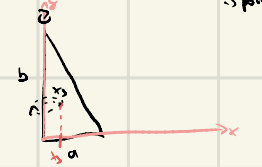

$$
S_{t} = \frac{1}{2} a b 
$$
$$
d_{r} = 2\pi x_{s}
$$
$$
V_{R} = \frac{1}{3} 2 \pi a^{2}b 
$$
$$
x_{s} = \frac{a}{3}
$$
Analogicky bychom mohli spočítat souřadnici $y_{s}$. (Pak bychom počítali kužel s výškou a a základnou b)
## Vážené průměry

Můžeme počítat vážené průměry všech souřadnic podle hmotnosti - přímo z definice hmotného středu. 

# Soustava hmotných bodů
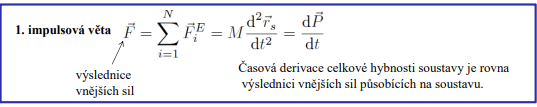
\
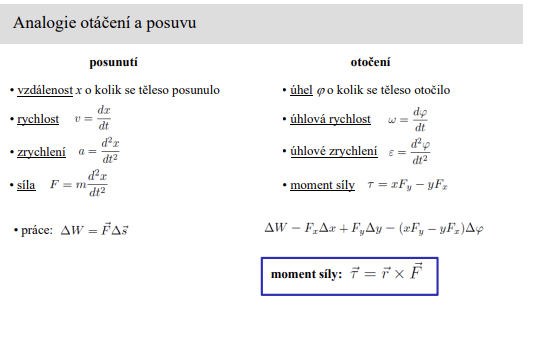
\
U rotace se práce vykonává ve dvou směrech - x i y\
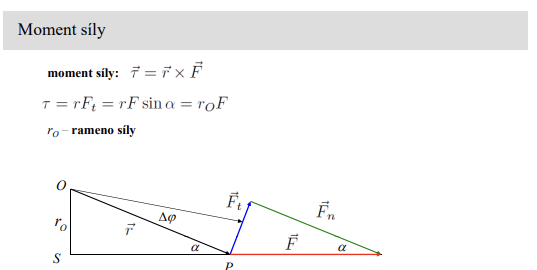

Působí-li na těleso nějaká síla, tak se na pohybu podílí pouze ta složka, která je ve směru pohybu. Totéž platí i pro moment síly - na tom se podílí pouze síla, která působí ve směru kolmém na otáčení.

# Problém dvou těles 
S popisem pohybu dvou těles jsme se setkali již v předchozích kapitolách, například u Keplerových zákonů, kde jsme  zjistili, že se planety kolem slunce pohybují po elipsách a ověřili to simulací. Problém dvou těles však pomocí hmotného bodu  pomocí těžišťové soustavy, převést na jedno-tělesový problém.
Začněme tím, že si problém nakreslíme:
\
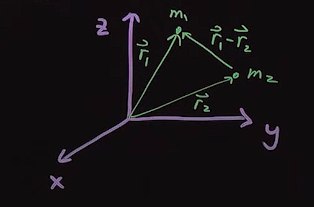
\
Pro síly v bodech 1 a 2 poté platí 2. Newtonův zákon ve tvaru:
$$
m_1 \vec{\frac{d^2 r_1}{d r_1 ^2}} = \vec{F}
$$
\
$$
m_1 \vec{\frac{d^2 r_1}{d r_1 ^2}} = - \vec{F}
$$
\
$$
\vec{F} = G \frac{m_1 m_2 (r_1-r_2)}{|r_1-r_2|^3}
$$
Nyní provedeme slíbený převod do těžišťové soustavy. Stanovme si $\vec{r}$ - vektor vzájemné vzdálenosti dvou bodů, a $\vec{R}$ - polohový vektor těžiště.
$$
\vec{r} = \vec{r_1} - \vec{r_2}
$$
\
$$
\vec{R} = \frac{m_1 \vec{r_1}- m_2\vec{r_1}}{m_1 + m_2}
$$
Nyní vyjádříme $r_1$ a $r_2$ vzhledem k novým souřadnicím:

$$
\vec{r_1} = R - \frac{m_2}{m_1+m_2}r
$$

$$
\vec{r_2} = R + \frac{m_1}{m_1 + m_2} r
$$

Síla působí do hmotého středu - do těžiště vložím obě dvě tělesa a poté rovnici počítáme:
\
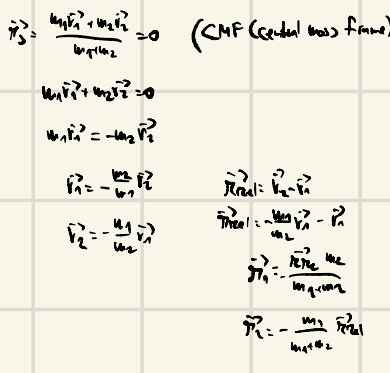



# Problém n těles
Při řešení problému n těles už nemůžeme převést problém na jednoduchý jednočásticový problém pomocí těžišťové soustavy soustavy a musíme postupovat numericky.  
## Newtonův 2. zákon pro n těles
Z Newtonova druhého zákona v kombinaci s Newtonovým gravitačním zákonem získáváme:
$$
\frac{d^{2}\vec{r_i}}{dt^2} = \sum_{j \neq i}^{n} \frac{G m_j}{|r|^{3}} \vec{r_{ij}}
$$
JInými slovy mám hmotnost $m_i$ a procházím přes všechny síly přitahující daný bod o té hmotnosti. Aby se nám pohodlněji počítalo, jednuše si převedeme veličiny do hezčích tvarů substitucemi:
$$
\vec{r_{ij}'} = \frac{\vec{r_{ij}}}{L} 
$$
\
$$
m_i '= \frac{m_i}{M}
$$
\
$$
t'= t\sqrt{\frac{GM}{L^3}}
$$
Kde všechny veličiny, kterými škálujeme jsou charakteristickými velikostmi příslušných veličin. Když bychom třeba řešili pro Sluneční soustavu, tak by $L$ bylo AU a m třebas hmotnost Země. Dále je potřeba provést trik s řešičem a trochu pozměnit jeho vstup + nastavit jej podle podmínek článku tak, abychom získali pravidelné orbity.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

# Kód pro problém tří těles

In [2]:
# Počáteční podmínky # mr. P. solver
# M = M_z, L = AU, G=1

m3 = 1 
v1 =  0.39295
v2 = 0.09758

# Nastavení z článku, abychom dosáhli stabilního oběhu. Pro zábavu možné měnit
# https://arxiv.org/pdf/1303.0181.pdf
# https://arxiv.org/pdf/1709.04775.pdf
m1 = 1
m2 = 1 
m3 = m3
x1_0 = -1
y1_0 = 0
x2_0 = 1
y2_0 = 0
x3_0 = 0
y3_0 = 0
vx1_0 =  v1
vy1_0 =  v2
vx2_0 = v1
vy2_0 = v2
vx3_0 = -2*v1/m3
vy3_0 = -2*v2/m3

In [3]:
def dSdt(t, S):
    x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    r13 = np.sqrt((x3-x1)**2 + (y3-y1)**2)
    r23 = np.sqrt((x2-x3)**2 + (y2-y3)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            vx3,
            vy3,
            m2/r12**3 * (x2-x1) + m3/r13**3 * (x3-x1), #mass 1
            m2/r12**3 * (y2-y1) + m3/r13**3 * (y3-y1),
            m1/r12**3 * (x1-x2) + m3/r23**3 * (x3-x2), #mass 2
            m1/r12**3 * (y1-y2) + m3/r23**3 * (y3-y2),
            m1/r13**3 * (x1-x3) + m2/r23**3 * (x2-x3), #mass 3
            m1/r13**3 * (y1-y3) + m2/r23**3 * (y2-y3)
           ]

In [4]:
t = np.linspace(0, 20, 1000)


In [5]:
sol = solve_ivp(dSdt, (0,20), y0=[x1_0, y1_0, x2_0, y2_0, x3_0, y3_0,
                       vx1_0, vy1_0, vx2_0, vy2_0, vx3_0, vy3_0],
                method = 'DOP853', t_eval=t, rtol=1e-10, atol=1e-13)

In [6]:
t = sol.t
x1 = sol.y[0]
y1 = sol.y[1]
x2 = sol.y[2]
y2 = sol.y[3]
x3 = sol.y[4]
y3 = sol.y[5]

In [7]:
tt = 1/np.sqrt(6.67e-11 * 1.99e30 / (1.5e11)**3 ) # čas v sekundách
tt = tt / (60*60 * 24* 365.25) * np.diff(t)[0] # time step - v rocích

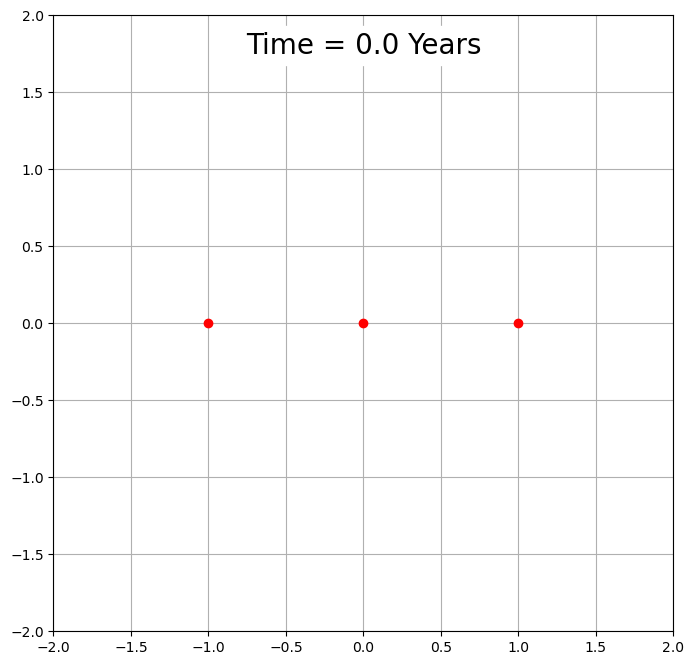

In [8]:
def animate(i):
    ln1.set_data([x1[i], x2[i], x3[i]], [y1[i], y2[i], y3[i]])
    text.set_text('Time = {:.1f} Years'.format(i*tt))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
ln1, = plt.plot([], [], 'ro', lw=3, markersize=6)
text = plt.text(0, 1.75, 'asdasd', fontsize=20, backgroundcolor='white', ha='center')
ax.set_ylim(-2, 2)
ax.set_xlim(-2,2)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('plan.gif',writer='pillow',fps=30)